In [9]:
##importing required libraries

In [10]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

import numpy as np

In [11]:
#pulling the data out of website

In [12]:
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"}
resp = requests.get('https://www.ambitionbox.com/list-of-companies?tag=startup&sort_by=popularity',headers=headers).text


In [14]:
resp=BeautifulSoup(resp,'lxml')

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1,minimum-scale=1" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <title>
   Startups in India - 5.1k companies | AmbitionBox
  </title>
  <meta content="2023 AmbitionBox" data-n-head="ssr" name="copyright"/>
  <meta content="1 day" data-n-head="ssr" name="revisit-after"/>
  <meta content="AmbitionBox" data-n-head="ssr" name="application-name"/>
  <meta content="EN" data-n-head="ssr" name="content-language"/>
  <meta content="462822053404-hphug4pkahqljh2tc96g35at47o4isv2.apps.googleusercontent.com" data-n-head="ssr" name="google-signin-client_id"/>
  <meta content="712617688793459" data-n-head="ssr" property="fb:app_id"/>
  <meta content="#ffffff" data-n-head="ssr" name="theme-color"/>
  <meta content="#ffffff" data-n-head="ssr" name="msapplication-navbutton-color"/>

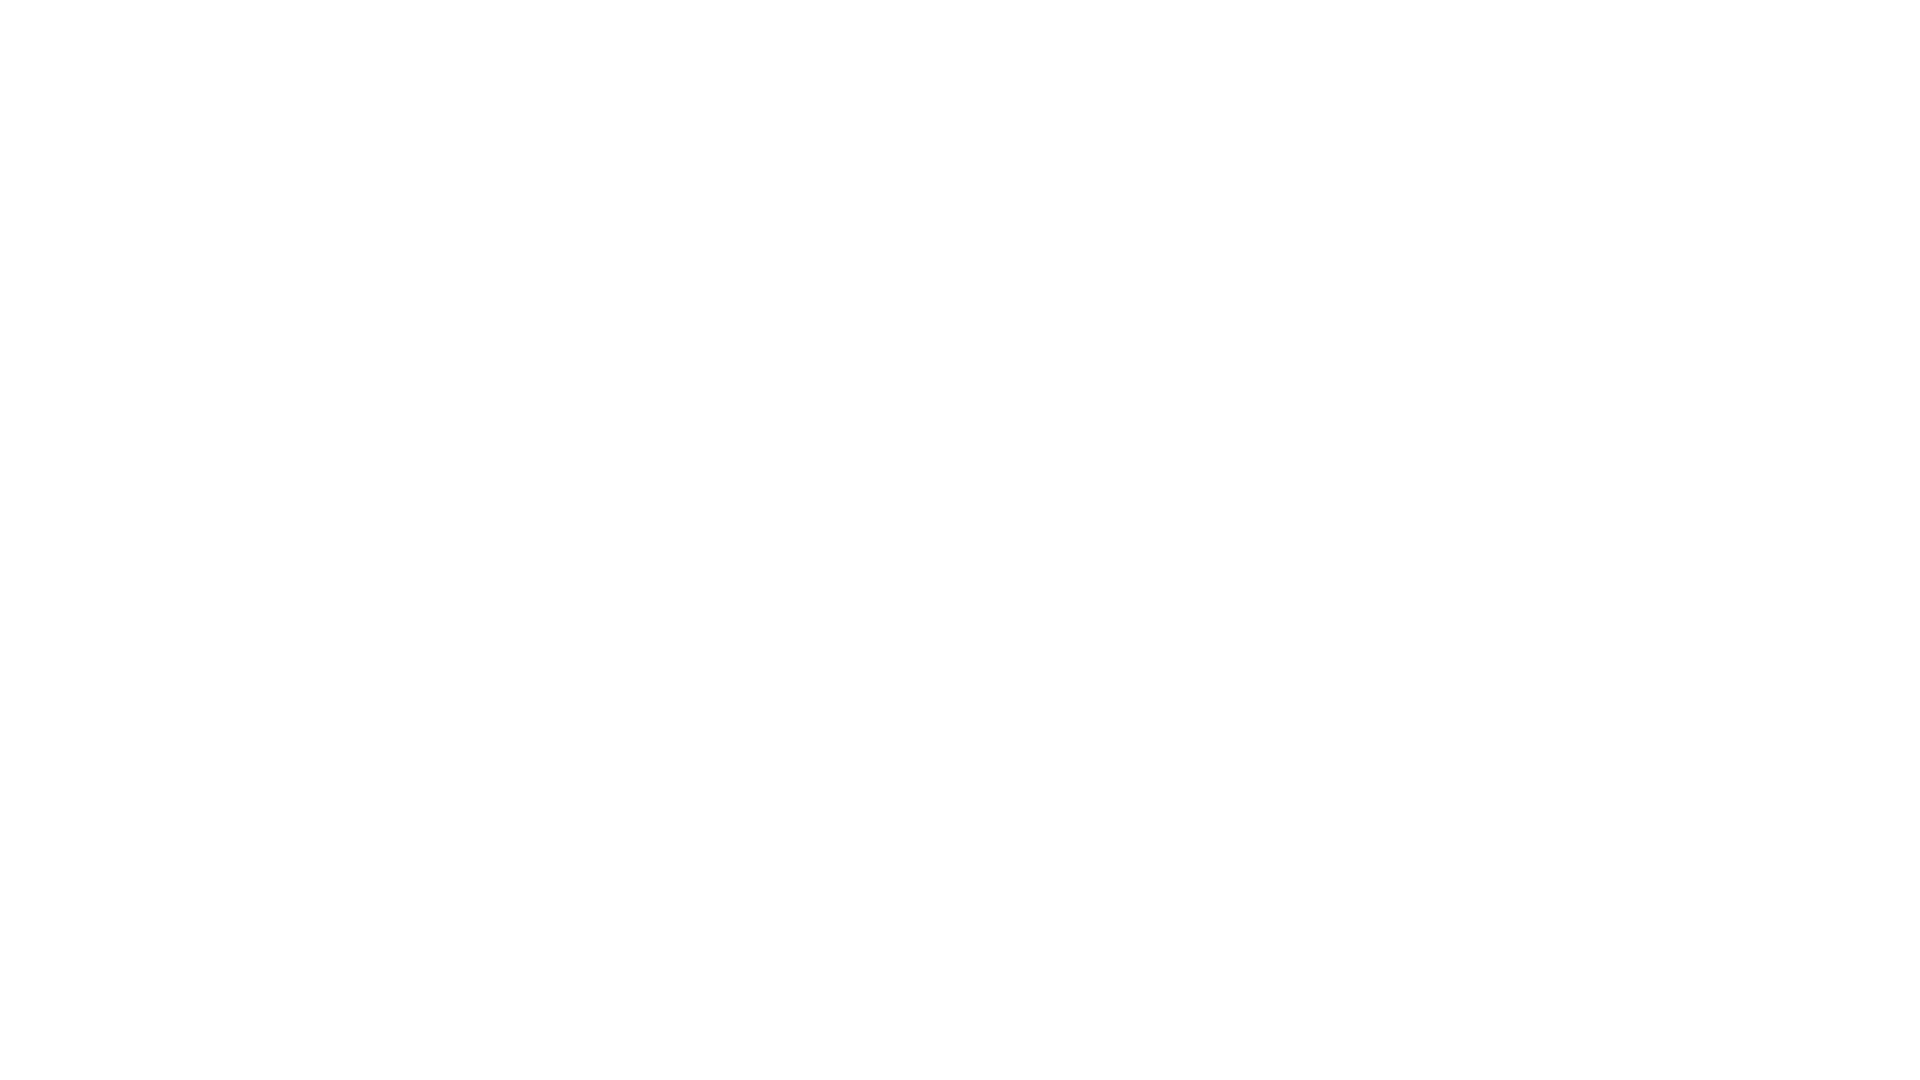

In [15]:
print(resp.prettify())

In [ ]:
## pulling out the names of the startups and hence further more details

In [14]:
for i in resp.find_all('h2'):
    print(i.text.strip())

Udaan
Oyo Rooms
Ecom Express
Whitehat jr
Swiggy
CMS IT Services
CARS24
Rivigo
BlackBuck
Blinkit
XpressBees
Ninjacart
ElasticRun
Intellect Design...
PhonePe
NoBroker
Paisabazaar.com
Unacademy
Meesho
SYSKA LED Lights
Planet Spark
Aye Finance
Toppr
FastInfo
Paytm Payments B...
Medlife
Wheelseye Techno...
UpGrad
Shadowfax Techno...
Better.com


In [55]:
resp.find_all('p',class_='rating')



[<p class="rating badge-large rating-4"><i class="icon icon-star"></i>
 									4.1
 								</p>,
 <p class="rating badge-large rating-35"><i class="icon icon-star"></i>
 									3.5
 								</p>,
 <p class="rating badge-large rating-4"><i class="icon icon-star"></i>
 									4.2
 								</p>,
 <p class="rating badge-large rating-35"><i class="icon icon-star"></i>
 									3.8
 								</p>,
 <p class="rating badge-large rating-4"><i class="icon icon-star"></i>
 									4.1
 								</p>,
 <p class="rating badge-large rating-3"><i class="icon icon-star"></i>
 									3.2
 								</p>,
 <p class="rating badge-large rating-35"><i class="icon icon-star"></i>
 									3.7
 								</p>,
 <p class="rating badge-large rating-35"><i class="icon icon-star"></i>
 									3.8
 								</p>,
 <p class="rating badge-large rating-4"><i class="icon icon-star"></i>
 									4.0
 								</p>,
 <p class="rating badge-large rating-35"><i class="icon icon-star"></i>
 									3.8
 								<

In [5]:
company=resp.find_all('div',class_='company-content-wrapper')
len(company)

30

In [16]:
import warnings
warnings.filterwarnings('ignore')
final = pd.DataFrame()
for j in range(1,163):
    url = 'https://www.ambitionbox.com/list-of-companies?tag=startup&sort_by=popularity&page={}'.format(j)
        
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"}
    resp = requests.get(url,headers=headers).text
    resp=BeautifulSoup(resp,'lxml')   
    company=resp.find_all('div',class_='company-content-wrapper')
    
    
    name=[]
    rating = []
    review = []
    ctype = []
    place = []
    age = []
    empl = []

    for i in company:
        name.append(i.find('h2').text.strip())
        #rating.append(i.find_all('p',class_='rating')[0].text.strip())
        try:
            rating.append(i.find_all('p',class_='rating')[0].text.strip())
        except:
            rating.append(np.nan)
        #review.append(i.find_all('a',class_='review-count')[0].text.strip())
        try:
            review.append(i.find_all('a',class_='review-count')[0].text.strip())
        except:
            review.append(np.nan)
        try:
            ctype.append(i.find_all('p',class_='infoEntity sbold-list-header')[0].text.strip())
        except:
            ctype.append(np.nan)
        try:
            place.append(i.find_all('p',class_='infoEntity sbold-list-header')[1].text.strip())
        except:
            place.append(np.nan)
        try:
            age.append(i.find_all('p',class_='infoEntity sbold-list-header')[2].text.strip())
        except:
            age.append(np.nan)
        try:
            empl.append(i.find_all('p',class_='infoEntity sbold-list-header')[3].text.strip())
        except:
            empl.append(np.nan)

    d = {'name' :name,'rating' : rating,'review' : review, 'ctype' :ctype,'place' : place, 'age' :age, 'number of emloyee': empl}
    df=pd.DataFrame(d)
    final= final.append(df,ignore_index=True)
    

final.to_excel('final.xlsx')

In [17]:
final

,name,rating,review,ctype,place,age,number of emloyee
0,Udaan,4.0,(4.8k Reviews),Private,"Bangalore,Karnataka + 331 more",7 years old,1k-5k Employees (India)
1,Oyo Rooms,3.5,(3k Reviews),Private,"Gurgaon,Haryana + 108 more",10 years old,1k-5k Employees (India)
2,Whitehat jr,3.7,(2.4k Reviews),Private,"Mumbai,Maharashtra + 46 more",5 years old,5k-10k Employees (India)
3,Swiggy,4.0,(2.4k Reviews),Private,"Bangalore,Karnataka + 145 more",9 years old,10k-50k Employees (India)
4,CARS24,3.7,(2.1k Reviews),Private,"Gurgaon,Haryana + 132 more",8 years old,5k-10k Employees (India)
...,...,...,...,...,...,...,...
4854,EasyFi,NaN,NaN,Mumbai,3 years old,1-10 Employees (India),NaN
4855,Lahori Zeera,NaN,NaN,"Rupnagar,Punjab",5 years old,51-200 Employees (India),NaN
4856,PeddleWeb,NaN,NaN,Private,"Ahmedabad,Gujarat",4 years old,11-50 Employees (India)
4857,Zippee,NaN,NaN,Private,"Gurgaon/Gurugram,Haryana",2 years old,11-50 Employees (India)


In [ ]:
##pulled out the cleaned data from excel for predicting the missing values

In [22]:
import pandas as pd
import numpy as np
from sklearn import linear_model
df = pd.read_excel(r"C:\Users\ragha\Downloads\cleaned data.xlsx")
df

,name,Valuation,profit,rating,review,ctype,place,age,MaxEmployees
0,Udaan,3200.00,-328.90,4.1,(4.3k Reviews),Private,"Bangalore,Karnataka + 302 more",6,5000
1,Oyo Rooms,2700.00,160.50,3.5,(3.2k Reviews),Private,"Gurgaon,Haryana + 103 more",9,5000
2,Ecom Express,1800.00,1.80,4.2,(2.3k Reviews),Private,"Gurgaon,Haryana + 481 more",10,50000
3,Swiggy,10000.00,-174.00,4.1,(2.3k Reviews),Private,"Bangalore,Karnataka + 135 more",8,50000
4,CARS24,3200.00,-3.70,3.7,(1.9k Reviews),Private,"Gurgaon,Haryana + 131 more",7,10000
...,...,...,...,...,...,...,...,...,...
61,DealShare,1600.00,53.87,3.4,(196 Reviews),Private,"Jaipur,Rajasthan + 30 more",4,500
62,myGate,170.00,2.09,3.4,(195 Reviews),Private,"Bangalore,Karnataka + 16 more",6,5000
63,5paisa Capital,54.75,4.25,3.8,(193 Reviews),Public,"Thane,Maharashtra + 6 more",7,1000
64,LendingKart,138.00,80.00,3.5,(192 Reviews),Public,"Ahmedabad,Gujarat + 20 more",8,500


In [23]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
61    False
62    False
63    False
64    False
65    False
Length: 66, dtype: bool

In [24]:

new_df = df.drop('name',axis = 'columns')
new_df1 = new_df.drop('Valuation',axis = 'columns')
new_df2 = new_df1.drop('profit',axis = 'columns')
new_df3 = new_df2.drop('rating',axis = 'columns')
new_df4 = new_df3.drop('review',axis = 'columns')
new_df5 = new_df4.drop('ctype',axis = 'columns')
new_df6 = new_df5.drop('place',axis = 'columns')
new_df8 = new_df6.drop('MaxEmployees',axis = 'columns')

new_df8

,age
0,6
1,9
2,10
3,8
4,7
...,...
61,4
62,6
63,7
64,8


In [25]:
from sklearn.linear_model import LinearRegression

model = linear_model.LinearRegression()
model.fit(new_df8, df.MaxEmployees)

LinearRegression()

In [18]:
##filling the missing value with the help of medians

In [26]:
import math
median_employees = math.floor(df.MaxEmployees.median())
median_employees

median_rating = math.floor(df.rating.median())
median_rating

median_age =  math.floor(df.age.median())

In [27]:
df.MaxEmployees = df.MaxEmployees.fillna(median_employees)
df.rating = df.rating.fillna(median_rating)

df

,name,Valuation,profit,rating,review,ctype,place,age,MaxEmployees
0,Udaan,3200.00,-328.90,4.1,(4.3k Reviews),Private,"Bangalore,Karnataka + 302 more",6,5000
1,Oyo Rooms,2700.00,160.50,3.5,(3.2k Reviews),Private,"Gurgaon,Haryana + 103 more",9,5000
2,Ecom Express,1800.00,1.80,4.2,(2.3k Reviews),Private,"Gurgaon,Haryana + 481 more",10,50000
3,Swiggy,10000.00,-174.00,4.1,(2.3k Reviews),Private,"Bangalore,Karnataka + 135 more",8,50000
4,CARS24,3200.00,-3.70,3.7,(1.9k Reviews),Private,"Gurgaon,Haryana + 131 more",7,10000
...,...,...,...,...,...,...,...,...,...
61,DealShare,1600.00,53.87,3.4,(196 Reviews),Private,"Jaipur,Rajasthan + 30 more",4,500
62,myGate,170.00,2.09,3.4,(195 Reviews),Private,"Bangalore,Karnataka + 16 more",6,5000
63,5paisa Capital,54.75,4.25,3.8,(193 Reviews),Public,"Thane,Maharashtra + 6 more",7,1000
64,LendingKart,138.00,80.00,3.5,(192 Reviews),Public,"Ahmedabad,Gujarat + 20 more",8,500


In [ ]:
##trained the model

In [78]:
reg = linear_model.LinearRegression()
reg.fit(df[['age','MaxEmployees','rating']],df.Valuation)



LinearRegression()

In [31]:
reg.coef_

array([1.28221196e+01, 5.93740359e-02, 5.89833039e+02])

In [32]:
reg.intercept_

-1456.1434659933477

In [33]:
1.28221196e+01*7 + 5.93740359e-02*500 + 5.89833039e+02*4.6 - 1456.14

1376.5338345499993

In [10]:
reg.intercept_

-1456.1434659933477

In [11]:
reg.predict([[7,500,4.6]])

C:\Users\ragha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1376.53036758])

In [30]:
d = pd.read_excel(r"C:\Users\ragha\Downloads\predict.xlsx")
d

,age,MaxEmployees,rating
0,6,5000,4.1
1,9,5000,3.5
2,10,50000,4.2
3,8,50000,4.1
4,7,10000,3.7
...,...,...,...
4799,10,200,3.0
4800,7,50000,3.0
4801,4,50000,3.0
4802,7,50000,3.0


In [33]:
##predicting and inserting the column valuations of the companies

In [94]:
p = reg.predict(d)

In [95]:
d['valuation'] = p
d

,age,MaxEmployees,rating,valuation
0,6,5000,4.1,1380.095342
1,9,5000,3.5,1018.046130
2,10,50000,4.2,4095.438427
3,8,50000,4.1,4045.278060
4,7,10000,3.7,1439.838074
...,...,...,...,...
4799,10,200,3.0,437.292205
4800,7,50000,3.0,3407.992210
4801,4,50000,3.0,3420.209612
4802,7,50000,3.0,3407.992210


In [35]:
d.to_csv("predicted.csv",index=False)

In [38]:
dv = pd.read_excel(r"C:\Users\ragha\Downloads\cleaned data.xlsx")

rev = linear_model.LinearRegression()
rev.fit(dv[['age','MaxEmployees','Valuation']],df.profit)



LinearRegression()

In [42]:
f = pd.read_csv(r"C:\Users\ragha\predicted.csv")
f

,age,MaxEmployees,rating
0,6,5000,4.1
1,9,5000,3.5
2,10,50000,4.2
3,8,50000,4.1
4,7,10000,3.7
...,...,...,...
4799,10,200,3.0
4800,7,50000,3.0
4801,4,50000,3.0
4802,7,50000,3.0


In [ ]:
#the same way profits are being predicted and column has been added

In [40]:
h= rev.predict(f)
f['profit'] = h
h

array([74.6689783 , 51.20536238,  1.34763135, ..., 48.30126787,
       24.83105078, 24.83105078])

In [41]:
f.to_csv("fpredicted.csv",index=False)

In [43]:
f = pd.read_excel(r"C:\Users\ragha\Downloads\short.xlsx")
f.duplicated().sum()
f.drop_duplicates(inplace=True)
f

,name,Valuation(in million dollars),profit(for the last FY in million dollars),rating,review,ctype,place,age(in years),MaxEmployees
0,Udaan,3200.000000,-328.900000,4.1,(4.3k Reviews),Private,"Bangalore,Karnataka + 302 more",6,5000
1,Oyo Rooms,2700.000000,160.500000,3.5,(3.2k Reviews),Private,"Gurgaon,Haryana + 103 more",9,5000
2,Ecom Express,1800.000000,1.800000,4.2,(2.3k Reviews),Private,"Gurgaon,Haryana + 481 more",10,50000
3,Swiggy,10000.000000,-174.000000,4.1,(2.3k Reviews),Private,"Bangalore,Karnataka + 135 more",8,50000
4,CARS24,3200.000000,-3.700000,3.7,(1.9k Reviews),Private,"Gurgaon,Haryana + 131 more",7,10000
...,...,...,...,...,...,...,...,...,...
4032,Photodotedit,437.292205,43.092235,3.0,(1 Reviews),Private,"Gurgaon/Gurugram,Haryana",10,200
4033,Parte Media,3407.992210,-12.630513,3.0,(1 Reviews),Private,"Jabalpur,Madhya Pradesh",7,50000
4034,Lattech,3420.209612,10.705289,3.0,(1 Reviews),Private,N.A.,4,50000
4035,Jain Roots,3407.992210,-12.630513,3.0,(1 Reviews),Sole Proprietorship,"Indore,Madhya Pradesh",7,50000


In [22]:
f.to_csv("final.csv",index=False)